# Bar Rank Race

In [2]:
# Import libraries
import pandas as pd
import numpy as np


In [46]:
# Flourish app

# Retrieved data from https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
raw_data_global = pd.read_csv(url, error_bad_lines=False)
raw_data_global.to_csv('raw_data_global.csv', index = False)


# Load Country flags image data
country_flag = pd.read_csv('Country Flags.csv')


# Delete columns
raw_data_global.drop(columns = ['Province/State', 'Lat', 'Long'], axis = 1, inplace = True)

# Change column name
raw_data_global = raw_data_global.copy()
raw_data_global.rename(columns={'Country/Region': 'Country Name'}, inplace = True)

# Check dataframe shapes
print("Country flag:", country_flag.shape)
print("Global confirmed cases:", raw_data_global.shape)
print("Global confirmed cases unique:", raw_data_global['Country Name'].nunique())


# Aggregate data by 'Country/Region'
data_global = raw_data_global.groupby(['Country Name']).sum().reset_index()

# Check dataframe shapes
print("data_global:", data_global.shape)





Country flag: (215, 2)
Global confirmed cases: (266, 103)
Global confirmed cases unique: 187
data_global: (187, 103)


In [48]:
# Check country names unity
list1 = raw_data_global['Country Name'].unique().tolist()
list2 = country_flag['Country Name'].tolist()

'''difference = set(list1).symmetric_difference(set(list2))
list_difference = list(difference)

print(list_difference)'''

set_difference = set(list1) - set(list2)
list_difference = list(set_difference)

print(list_difference)

set_difference = set(list2) - set(list1)
list_difference = list(set_difference)

print('\n', list_difference)

['Holy See', 'Burma', 'US', 'Diamond Princess', 'Taiwan*', 'Saint Lucia', 'MS Zaandam', 'Laos', 'Saint Kitts and Nevis', 'Korea, South', 'Czechia', 'Western Sahara', 'Kosovo', 'Saint Vincent and the Grenadines']

 ['French Polynesia', 'St. Vincent and the Grenadines', 'Aruba', 'Nauru', 'Cayman Islands', 'Samoa', 'British Virgin Islands', 'Isle of Man', 'Marshall Islands', 'Faroe Islands', 'Sint Maarten (Dutch part)', 'Palau', 'Lao PDR', 'Tuvalu', 'Curacao', 'Hong Kong SAR, China', 'Gibraltar', 'Northern Mariana Islands', 'St. Lucia', ' North Korea', 'St. Martin (French part)', 'Guam', 'United States', 'Turks and Caicos Islands', 'Puerto Rico', 'Czech Republic', 'South Korea', 'St. Kitts and Nevis', 'Micronesia, Fed. Sts.', 'Myanmar', 'New Caledonia', 'Lesotho', 'Solomon Islands', 'American Samoa', 'Turkmenistan', 'Vanuatu', 'Virgin Islands (U.S.)', 'Tonga', 'Macao SAR, China', 'Kiribati', 'Bermuda', 'Greenland']


In [49]:
data_global.replace({'Saint Lucia': 'St. Lucia', 'US': 'United States', 'Czechia': 'Czech Republic',
                     'Saint Kitts and Nevis':'St. Kitts and Nevis', 'Korea, South': 'South Korea',
                     'Saint Vincent and the Grenadines': 'St. Vincent and the Grenadines'}, inplace = True)

In [50]:
# Merge 
data_global_w_flag = data_global.merge(country_flag, on = 'Country Name')


'''
# Change column position
URL = data_global_w_flag['Image URL']
data_global_w_flag.drop(labels=['Image URL'], axis=1, inplace = True)
data_global_w_flag.insert(1, 'Image URL', URL)
print("data_global_w_flag 2:", data_global.shape)
'''


data_global_w_flag.to_csv('data global w flag.csv', index = False)

# Line plot

In [37]:
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
raw_data_global = pd.read_csv(url, error_bad_lines=False)

# Delete columns
raw_data_global.drop(columns = ['Province/State', 'Lat', 'Long'], axis = 1, inplace = True)


#raw_data_global['Total_case']= raw_data_global.iloc[:, 3:0].sum(axis=1)


raw_data_global.sort_values(raw_data_global.columns[-1], inplace = True, ascending = False)

data_global_top5 = raw_data_global.iloc[0:5, :].reset_index(drop=True)


# logcolumns = data_global_top5.columns[3:].tolist()
#data_global_top10.loc[:, logcolumns] = np.log(data_global_top10[logcolumns])
#length = data_global.shape[1]-3


# for i in logcolumns:
#     data_global_top5['log_' + str(i)] = np.log(data_global_top5[str(i)])
    
    
# data_global_top5.replace(-np.inf, 0, inplace = True)

# data_global_top5.to_csv('data_global_top5.csv', index = False)

In [38]:
data_global_top5

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20
0,US,1,1,2,2,5,5,5,5,5,...,905358,938154,965785,988197,1012582,1039909,1069424,1103461,1132539,1158040
1,Spain,0,0,0,0,0,0,0,0,0,...,202990,205905,207634,209465,210773,212917,213435,213435,216582,217466
2,Italy,0,0,0,0,0,0,0,0,0,...,192994,195351,197675,199414,201505,203591,205463,207428,209328,210717
3,United Kingdom,0,0,0,0,0,0,0,0,0,...,143464,148377,152840,157149,161145,165221,171253,177454,182260,186599
4,France,0,0,2,3,3,3,4,5,5,...,158636,160292,160847,164589,167605,165093,165764,165764,166976,167272


In [39]:
data_global_top5_log = data_global_top5.copy().iloc[:,0:1]

logcolumns = data_global_top5.columns[1:].tolist()

for i in logcolumns:
    data_global_top5_log['log_' + str(i)] = np.log(data_global_top5[str(i)])
    
    
data_global_top5_log.replace(-np.inf, 0, inplace = True)



/Users/shiqi_ning/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:856: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [40]:
data_global_top5_log

,Country/Region,log_1/22/20,log_1/23/20,log_1/24/20,log_1/25/20,log_1/26/20,log_1/27/20,log_1/28/20,log_1/29/20,log_1/30/20,...,log_4/24/20,log_4/25/20,log_4/26/20,log_4/27/20,log_4/28/20,log_4/29/20,log_4/30/20,log_5/1/20,log_5/2/20,log_5/3/20
0,US,0.0,0.0,0.693147,0.693147,1.609438,1.609438,1.609438,1.609438,1.609438,...,13.716086,13.751669,13.780697,13.803637,13.828014,13.854644,13.882631,13.913962,13.939973,13.962239
1,Spain,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,12.220912,12.235170,12.243532,12.252312,12.258537,12.268658,12.271088,12.271088,12.285725,12.289798
2,Italy,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,12.170414,12.182553,12.194380,12.203138,12.213569,12.223868,12.233021,12.242540,12.251658,12.258271
3,United Kingdom,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,11.873839,11.907512,11.937147,11.964950,11.990060,12.015039,12.050897,12.086467,12.113190,12.136717
4,France,0.0,0.0,0.693147,1.098612,1.098612,1.098612,1.386294,1.609438,1.609438,...,11.974368,11.984752,11.988209,12.011207,12.029365,12.014264,12.018320,12.018320,12.025605,12.027377


In [41]:
from datetime import datetime
dates = data_global_top5.columns[1:].tolist()
dates_list = [datetime.strptime(date, '%m/%d/%y').date() for date in dates]


In [104]:
lockdown_top5['Date']

4     2020-03-23
16    2020-03-16
26    2020-03-11
27    2020-03-23
30    2020-03-14
Name: Date, dtype: object

In [109]:
# Lock down dates
lockdown = pd.read_csv('countryLockdowndatesJHUMatch.csv')

lockdown_top5 = lockdown.loc[lockdown['Country/Region'].isin(['US','Spain', 'Italy', 'UK', 'France'])]

idx =[]
for i in lockdown_top5['Date'].to_numpy():
    date = datetime.strptime(i, '%Y-%m-%d')
    date_fix = '{0}/{1}/{2:02}'.format(date.month, date.day, date.year % 100)
    
    idx.append(dates.index(date_fix))

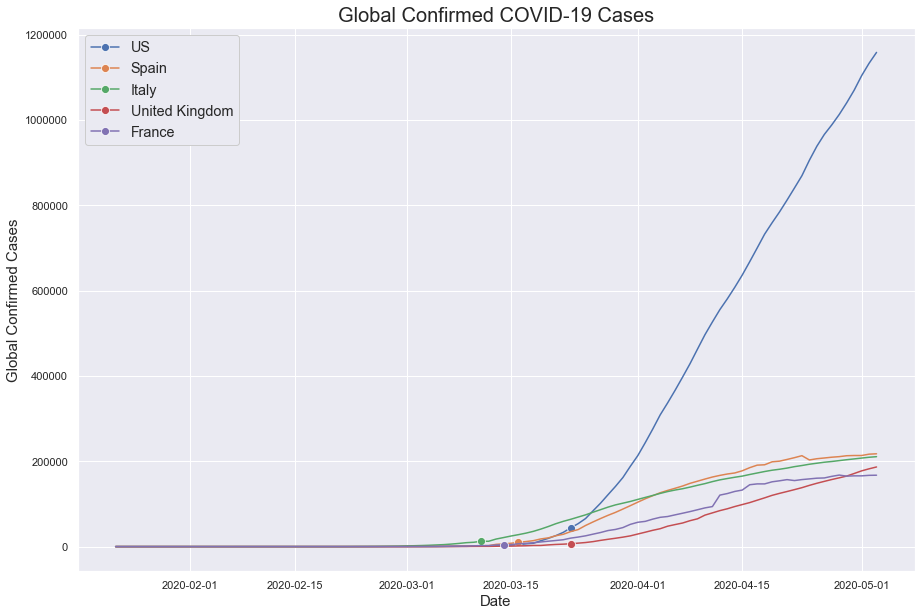

In [121]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
for i in range(5):
    ax = sns.lineplot(x = dates_list, y = data_global_top5.iloc[i:i+1, 1:].to_numpy()[0], marker = "o", ms = 8, markevery =[idx[i]])

ax.legend(['US','Spain', 'Italy', 'United Kingdom', 'France'], fontsize = 'large', framealpha = 1)
plt.xlabel('Date', fontsize = 15)
plt.ylabel('Global Confirmed Cases', fontsize = 15)
plt.title('Global Confirmed COVID-19 Cases', fontsize = 20)
plt.show()

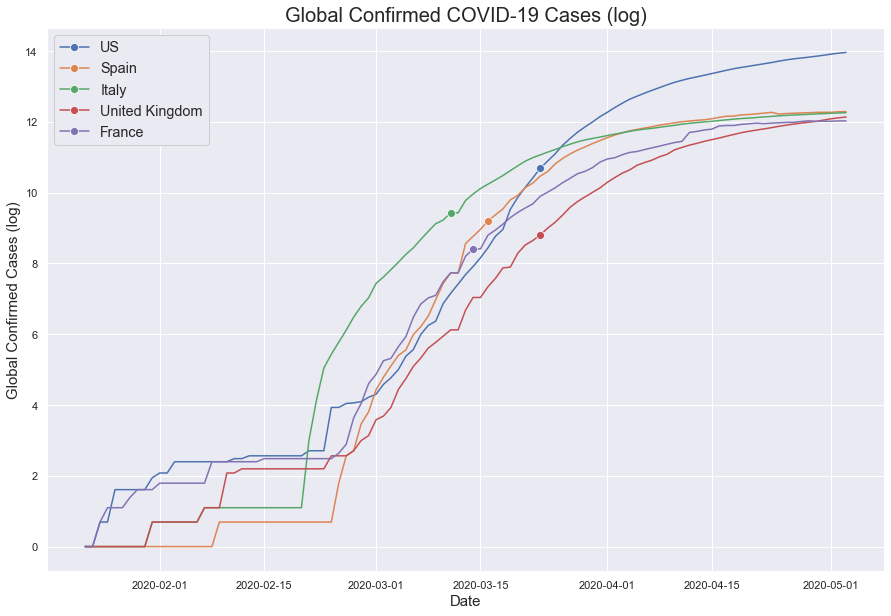

In [120]:
plt.figure(figsize=(15, 10))
for i in range(5):
    ax = sns.lineplot(x = dates_list, y = data_global_top5_log.iloc[i:i+1, 1:].to_numpy()[0], marker = "o", ms = 8, markevery = [idx[i]])

ax.legend(['US','Spain', 'Italy', 'United Kingdom', 'France'], fontsize = 'large', framealpha = 1)
plt.xlabel('Date', fontsize = 15)
plt.ylabel('Global Confirmed Cases (log)', fontsize = 15)
plt.title('Global Confirmed COVID-19 Cases (log)', fontsize = 20)
plt.show()

In [ ]:
data_global_top5.to_csv('data_global_top5.csv', index = False)

# Map Rank Data

In [64]:
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
raw_data_global = pd.read_csv(url, error_bad_lines=False)
# Delete columns
raw_data_global.drop(columns = ['Province/State'], axis = 1, inplace = True)


In [65]:
raw_data_global.head()

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20
0,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,...,1279,1351,1463,1531,1703,1828,1939,2171,2335,2469
1,Albania,41.1533,20.1683,0,0,0,0,0,0,0,...,663,678,712,726,736,750,766,773,782,789
2,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,...,3007,3127,3256,3382,3517,3649,3848,4006,4154,4295
3,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,...,723,731,738,738,743,743,743,745,745,747
4,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,...,25,25,25,26,27,27,27,27,30,35


In [66]:
data_global = pd.concat([raw_data_global[['Country/Region', 'Lat', 'Long']],
                         raw_data_global.groupby(['Country/Region', 'Lat', 'Long']).cumsum(axis = 1)], axis = 1)

In [67]:
data_global.head()

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20
0,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,...,16476,17827,19290,20821,22524,24352,26291,28462,30797,33266
1,Albania,41.1533,20.1683,0,0,0,0,0,0,0,...,12723,13401,14113,14839,15575,16325,17091,17864,18646,19435
2,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,...,49540,52667,55923,59305,62822,66471,70319,74325,78479,82774
3,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,...,16712,17443,18181,18919,19662,20405,21148,21893,22638,23385
4,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,...,465,490,515,541,568,595,622,649,679,714


In [68]:
data_global_melt = data_global.melt(id_vars=['Country/Region', 'Lat', 'Long'], 
                    var_name = 'Date', 
                    value_name = 'Value')

data_global_melt.head()


,Country/Region,Lat,Long,Date,Value
0,Afghanistan,33.0000,65.0000,1/22/20,0
1,Albania,41.1533,20.1683,1/22/20,0
2,Algeria,28.0339,1.6596,1/22/20,0
3,Andorra,42.5063,1.5218,1/22/20,0
4,Angola,-11.2027,17.8739,1/22/20,0


In [58]:
# today = pd.to_datetime('today').strftime('X%m/X%d/%y').replace('X0','X').replace('X','')
# data_global_melt[data_global_melt['Date'] == today]

# data_global_melt['Count'] = data_global_melt['Value'] 
# data_global_melt.loc[data_global_melt['Date'] != '4/18/20', 'Count'] = 0

data_global_melt.to_csv('data_global_melt.csv', index = False)

# Map Rank with US States Data

In [59]:
url_us = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
raw_data_us = pd.read_csv(url_us, error_bad_lines=False)
#raw_data_us.to_csv('raw_data_global.csv', index = False)

# Delete columns
raw_data_us.drop(columns = ['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State', 'Combined_Key'], axis = 1, inplace = True)
raw_data_us.rename(columns={'Country_Region': 'Country/Region', 
                            'Long_': 'Long', 
                            '/202/10/20':'02/10/20'}, inplace = True)
raw_data_us = raw_data_us[raw_data_us['Lat'] != 0]
raw_data_global = raw_data_global[raw_data_global['Lat'] != 0]


# Global data w/o US
data_global_wo_us = raw_data_global[raw_data_global['Country/Region'] != 'US']
raw_data_us[raw_data_us['Lat'] == 0]



,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20


In [60]:
raw_data_us.head()

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20
0,US,-14.271000,-170.132000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,US,13.444300,144.793700,0,0,0,0,0,0,0,...,139,141,141,141,141,141,141,145,145,145
2,US,15.097900,145.673900,0,0,0,0,0,0,0,...,14,14,14,14,14,14,14,14,14,14
3,US,18.220800,-66.590100,0,0,0,0,0,0,0,...,1416,1276,1307,1371,1389,1400,1433,1539,1575,1757
4,US,18.335800,-64.896300,0,0,0,0,0,0,0,...,54,54,55,57,57,57,57,66,66,66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3256,US,39.372319,-111.575868,0,0,0,0,0,0,0,...,21,21,21,21,22,22,22,23,23,23
3257,US,38.996171,-110.701396,0,0,0,0,0,0,0,...,7,8,11,12,13,13,14,12,13,15
3258,US,37.854472,-111.441876,0,0,0,0,0,0,0,...,76,81,83,87,89,91,93,98,101,103
3259,US,40.124915,-109.517442,0,0,0,0,0,0,0,...,9,9,9,10,11,11,11,13,13,13


In [61]:
# data_us = pd.concat([raw_data_us[['Country/Region', 'Lat', 'Long']],
#                      raw_data_us.groupby(['Country/Region', 'Lat', 'Long']).cumsum(axis = 1)], axis = 1)

In [62]:
# Append US with Global data
data_all = data_global_wo_us.append(raw_data_us, ignore_index = True)

data_all.head()

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20
0,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,0,...,1279,1351,1463,1531,1703,1828,1939,2171,2335,2469
1,Albania,41.153300,20.168300,0,0,0,0,0,0,0,...,663,678,712,726,736,750,766,773,782,789
2,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,...,3007,3127,3256,3382,3517,3649,3848,4006,4154,4295
3,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,...,723,731,738,738,743,743,743,745,745,747
4,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,...,25,25,25,26,27,27,27,27,30,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3411,US,39.372319,-111.575868,0,0,0,0,0,0,0,...,21,21,21,21,22,22,22,23,23,23
3412,US,38.996171,-110.701396,0,0,0,0,0,0,0,...,7,8,11,12,13,13,14,12,13,15
3413,US,37.854472,-111.441876,0,0,0,0,0,0,0,...,76,81,83,87,89,91,93,98,101,103
3414,US,40.124915,-109.517442,0,0,0,0,0,0,0,...,9,9,9,10,11,11,11,13,13,13


In [63]:
data_global_melt_new = data_all.melt(id_vars=['Country/Region', 'Lat', 'Long'], 
                       var_name = 'Date', 
                       value_name = 'Value')

data_global_melt_new
data_global_melt_new.to_csv('data_global_melt_new.csv', index = False)

# Tweets

In [1]:
###Packages-----------------------
import tweepy
from tweepy import OAuthHandler
import datetime
import pandas as pd
import numpy as np


## Create all the keys and secrets that you get
## from using the Twitter API-------------------------------------
 

consumer_key = '8UK1HSPcbU7ehAQNIkd2gj5Cz'
consumer_secret = 'zbqlFdtQMKGRY7vPx8lTADvabXgeY5wilDsXccdqE7Oq6NHsa1'
access_token = '1025051412303097856-QWoFvhfaDbGssz78YdflwOBTUcmucP'
access_secret = 'K5hWgdbYkdCbK1XDAW92rO4TsRGiQ6PZciUOTAyc8uQtw'
 
    
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
 
api = tweepy.API(auth,  wait_on_rate_limit=True,  wait_on_rate_limit_notify=True)



In [2]:
def get_tweets(date, query, max_lim):
    df = pd.DataFrame(columns=['text', 'source', 'url'])
    msgs = []
    msg =[]

    for tweet in tweepy.Cursor(api.search, q=query, rpp=100, since = date[0], until = date[1], lang = 'en').items(max_lim):
        msg = [tweet.created_at, tweet.id, tweet.text] 
        msg = tuple(msg)                    
        msgs.append(msg)

    df = pd.DataFrame(msgs, columns=['Datetime', 'Tweet Id', 'Text'])
    return df

In [25]:
import nltk
#nltk.download('punkt') # wordpunct_tokenize
#nltk.download('averaged_perceptron_tagger') # tagged words

from nltk.tokenize import WhitespaceTokenizer
from nltk.tokenize import wordpunct_tokenize
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize

# Preprocessing data
from nltk.corpus import stopwords


from nltk.stem import WordNetLemmatizer
import re


# Remove stop words and punctuation and reprocessing
def preprocessing(dataset):
    
    text_list = list(dataset['Text'])

    # Stop words
    add_stop = ['rt', 'de', 'en', 'http', 'https', 'co', 'th', 'v', 'u']
    stop_words = stopwords.words('english')  + stopwords.words('spanish') + stopwords.words('french') + add_stop
    
    # Stemmer
    stemmer = TweetTokenizer()
    
    # Create empty list to store tokens
    documents = []
        
    
    # Regex
    for sen in range(0, len(text_list)):
        # Substituting all latex into ''
        document = re.sub(r"\$\$.*?\$\$", '', str(text_list[sen]))
    
        # Remove all the special characters
        document = re.sub(r"\$.*?\$", '', document)
        
        # Removing all the special characters/punctuation
        document = re.sub(r'\W', ' ', document)
        
        # Remove the prefixed 'Abstract'
        document = document.replace('Abstract', '', 1)
        
        # Removing all single characters
        document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)

        # Removing single characters from the start
        document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 

        # Substituting multiple spaces with single space
        document = re.sub(r'\s+', ' ', document, flags = re.I)
        
        # Removing numbers
        document = re.sub(r'[0-9]\S+|[0-9]', ' ', document)
        
        # Converting to Lowercase
        document = document.lower()

        # Tokenize
        document = document.split()

   
        # Removing stop words
        document = [w for w in document if w not in stop_words]

        
        documents.append(document)

    return documents

In [4]:
# Query tweets late Apr
tweet_covid = get_tweets(['2020-04-28', '2020-05-01'], 'covid', 1000)
tweet_stayhome = get_tweets(['2020-04-28', '2020-05-01'], 'stay home', 1000)

In [26]:
# Processing
text_covid = preprocessing(tweet_covid)
text_stayhome = preprocessing(tweet_stayhome)

In [28]:
with open('text_covid.txt', 'w') as filehandle:
    filehandle.writelines("%s\n" % tweet for tweet in text_covid)
    
with open('tweets_stayhome.txt', 'w') as filehandle:
    filehandle.writelines("%s\n" % tweet for tweet in text_stayhome)
    


In [33]:
url = 'https://raw.githubusercontent.com/thepanacealab/covid19_twitter/master/dailies/2020-03-31/2020-03-31_top1000terms.csv'
tweet0331 = pd.read_csv(url, error_bad_lines = False, header = None)
tweet0331.columns = ['token', 'count']

tweet0331_token = []
i = 0
for token in tweet0331['token']:
    tweet0331_token.append((str(token),)* int(tweet0331['count'][i]/10))
    i = i + 1

import functools
import operator

tweet0331_token = functools.reduce(operator.iconcat, tweet0331_token, [])
    
with open('tweet0331_token.txt', 'w') as filehandle:
    filehandle.writelines("%s\n" % token for token in (tweet0331_token))


In [34]:
url = 'https://raw.githubusercontent.com/thepanacealab/covid19_twitter/master/dailies/2020-04-15/2020-04-15_top1000terms.csv'
tweet0415 = pd.read_csv(url, error_bad_lines = False, header = None)
tweet0415.columns = ['token', 'count']

tweet0415_token = []
i = 0
for token in tweet0415['token']:
    tweet0415_token.append((str(token),)* int(tweet0415['count'][i]/10))
    i = i + 1

import functools
import operator

tweet0415_token = functools.reduce(operator.iconcat, tweet0415_token, [])
    
with open('tweet0415_token.txt', 'w') as filehandle:
    filehandle.writelines("%s\n" % token for token in (tweet0415_token))



In [35]:
url = 'https://raw.githubusercontent.com/thepanacealab/covid19_twitter/master/dailies/2020-05-01/2020-05-01_top1000terms.csv'
tweet0501 = pd.read_csv(url, error_bad_lines = False, header = None)
tweet0501.columns = ['token', 'count']

tweet0501_token = []
i = 0
for token in tweet0501['token']:
    tweet0501_token.append((str(token),)* int(tweet0501['count'][i]/10))
    i = i + 1

import functools
import operator

tweet0501_token = functools.reduce(operator.iconcat, tweet0501_token, [])
    
with open('tweet0501_token.txt', 'w') as filehandle:
    filehandle.writelines("%s\n" % token for token in (tweet0501_token))